# Chapter 04

<img src="images/basicprob.jpg"/>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

**Exercise 4.1. Conditional Probability - Computing the probabilities of the hair colors given Brown eye, and the probabilities the eye colors given Brown hair**

In [2]:
# p's(hairs)/p(brown eyes)

# p's(eyes)/p(brown hair)

In [3]:
df = pd.read_csv('data/hair_eye_color.csv')

df

,Gender,Eye,Black,Brown,Red,Blond
0,M,Brown,32,53,10,3
1,M,Blue,11,50,10,30
2,M,Hazel,10,25,7,5
3,M,Green,3,15,7,8
4,F,Brown,36,66,16,4
5,F,Blue,9,34,7,64
6,F,Hazel,5,29,7,5
7,F,Green,2,14,7,8


In [4]:
hairs = ['Black','Brown','Red','Blond']

table = df.groupby(['Eye'])[hairs].sum()

table.head()

,Black,Brown,Red,Blond
Eye,,,,
Blue,20,84,17,94
Brown,68,119,26,7
Green,5,29,14,16
Hazel,15,54,14,10


In [5]:
#Total sum per column:
table.loc['Marg (Hair Color)'] = table.sum(axis=0)

#Total sum per row:
table.loc[:,'Marg (Eye Color)'] = table.sum(axis=1)

table

,Black,Brown,Red,Blond,Marg (Eye Color)
Eye,,,,,
Blue,20,84,17,94,215
Brown,68,119,26,7,220
Green,5,29,14,16,64
Hazel,15,54,14,10,93
Marg (Hair Color),108,286,71,127,592


In [6]:
# p's(hairs)/p(brown eyes)

# Total Brown Eyes: table.iloc[1][4]

p_blackh_browne = table.iloc[1][0] / table.iloc[1][4]
p_brownh_browne = table.iloc[1][1] / table.iloc[1][4]
p_redh_browne = table.iloc[1][2] / table.iloc[1][4]
p_bloondh_browne = table.iloc[1][3] / table.iloc[1][4]

check = p_blackh_browne + p_brownh_browne + p_redh_browne + p_bloondh_browne

print(f'P(black hair|brown eyes): {round(p_blackh_browne,2)}')
print(f'P(brown hair|brown eyes): {round(p_brownh_browne,2)}')
print(f'P(red hair|brown eyes): {round(p_redh_browne,2)}')
print(f'P(bloond hair|brown eyes): {round(p_bloondh_browne,2)}')
print()
print(f'Check sanity: {round(check,2)}')

P(black hair|brown eyes): 0.31
P(brown hair|brown eyes): 0.54
P(red hair|brown eyes): 0.12
P(bloond hair|brown eyes): 0.03

Check sanity: 1.0


In [7]:
# p's(eyes)/p(brown hair)

# Total Brown Hair: table.iloc[4][1]

p_bluee_brownh = table.iloc[0][1] / table.iloc[4][1]
p_browne_brownh = table.iloc[1][1] / table.iloc[4][1]
p_greene_brownh = table.iloc[2][1] / table.iloc[4][1]
p_hazele_brownh = table.iloc[3][1] / table.iloc[4][1]

check = p_bluee_brownh + p_browne_brownh + p_greene_brownh + p_hazele_brownh

print(f'P(blue eyes|brown hair): {round(p_bluee_brownh,2)}')
print(f'P(brown eyes|brown hair): {round(p_browne_brownh,2)}')
print(f'P(green eyes|brown hair): {round(p_greene_brownh,2)}')
print(f'P(hazel eyes|brown hair): {round(p_hazele_brownh,2)}')
print()
print(f'Check sanity: {round(check,2)}')

P(blue eyes|brown hair): 0.29
P(brown eyes|brown hair): 0.42
P(green eyes|brown hair): 0.1
P(hazel eyes|brown hair): 0.19

Check sanity: 1.0


In [8]:
# let's see each probability normalized

table_norm = table/592

table_norm

,Black,Brown,Red,Blond,Marg (Eye Color)
Eye,,,,,
Blue,0.033784,0.141892,0.028716,0.158784,0.363176
Brown,0.114865,0.201014,0.043919,0.011824,0.371622
Green,0.008446,0.048986,0.023649,0.027027,0.108108
Hazel,0.025338,0.091216,0.023649,0.016892,0.157095
Marg (Hair Color),0.182432,0.483108,0.119932,0.214527,1.000000


**Exercise 4.2. Simulate a biased coin that has p(H) = 0.8. Change the
height of the reference line in the plot to match p(H).**

End proportion: 0.786


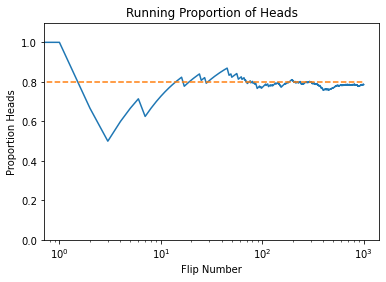

In [9]:
N = 1000
p_head = 0.8

# Generate a random sample of N flips (heads=1, tails=0):
coin_flips = np.random.rand(N) < p_head

# Compute the running proportion of heads:
running_avarage = np.cumsum(coin_flips) / (np.arange(N) + 1)

print('End proportion: {}'.format(running_avarage[-1]))

# Plot
plt.title('Running Proportion of Heads')
plt.gca().set(xscale='log')
plt.plot(running_avarage)
plt.ylim(0, 1.1)
plt.xlabel('Flip Number')
plt.ylabel('Proportion Heads')

# Plot proportion line
plt.plot((0, N), (p_head, p_head), linestyle='dashed');

**Exercise 4.3. Determine the exact probability of drawing a 10 from a shuffled pinochle deck. (In a pinochle deck, there are 48 cards. There are six values: 9, 10, Jack, Queen, King, Ace. There are two copies of each value in each of the standard four suits: hearts, diamonds, clubs, spades.)**

    (A) What is the probability of getting a 10?
    (B) What is the probability of getting a 10 or Jack?

In [10]:
# Answer A

# There are 8 cards of value 10. Total of carts is 48.

a = round(8/48,4)

print(f'Answer(A): {a}')

# Answer B

# There are 8 cards of value 10. Total of carts is 48.

b = round(16/48,4)

print(f'Answer(A): {b}')

Answer(A): 0.1667
Answer(A): 0.3333


**Exercise 4.4. Consider a spinner with a [0,1] scale on its circumference. Suppose that the spinner is slanted or magnetized or bent in some way such that it is biased, and its probability density function is p(x) = 6x(1 − x) over the interval x ∈ [0, 1].**

    (A) Adapt the program IntegralOfDensity.R to plot this density function and approximate its integral. Comment your code. Be careful to consider values of x only in the interval [0, 1].
    (B) Derive the exact integral using calculus.
    (C) Does this function satisfy Equation 4.3?
    (D) From inspecting the graph, what is the maximal value of p(x)?

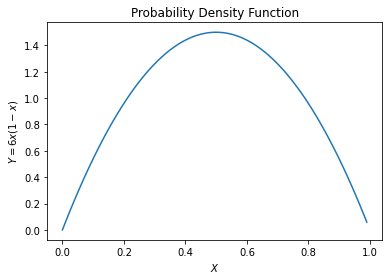

In [11]:
# Answer (A)

def p(x):
    return 6 * x * (1 - x)

dx = 0.01
x = np.arange(0, 1, dx)

plt.plot(x, p(x))
plt.xlabel('$X$')
plt.ylabel('$Y = 6x(1 - x)$')
plt.title('Probability Density Function');

Answer (B):

$$\int_{0}^{1}dx\ 6x(1 - x) = \int_{0}^{1}dx\ 6x - 6x ^ 2 = 3x ^ 2 - 2x ^ 3 \biggr\rvert_ {0}^{1} = 3 - 2 = 1$$


Answer (C):
    
Yes! $$\int_{}^{}dx*p(x) = 1$$



Answer (D):
    
    From the graph, it appears that the maximum density is 1.5 when x-0.5. 
    Indeed, 6*0.5*(1 - 0.5) = 1.5.

**Exercise 4.5.**

    (A) Adapt the code from IntegralOfDensity.R to determine (approximately) the probability mass under the normal curve from x = μ−σ to x = μ+σ. Comment your code.
    (B) Now use the normal curve to describe the following belief. Suppose you believe that women’s heights follow a bell-shaped distribution, centered at 162 cm with about two-thirds of all women having heights between 147 and 177 cm. What should be the μ and σ parameter values?

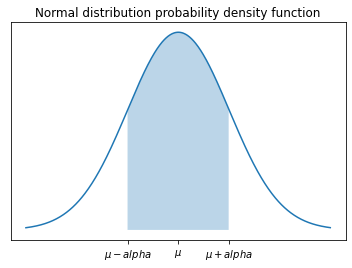

In [12]:
# Answer (A)

mu = 0
alpha = 1
norm_pdf = norm(mu, alpha).pdf

dx = 0.01
base = np.arange(-3, 3, dx)

x = np.arange(-alpha, alpha, dx)

plt.plot(base, norm_pdf(base))
plt.fill_between(x, 0, norm_pdf(x), alpha=0.3)
plt.title('Normal distribution probability density function')
plt.xticks([-1, 0, 1], ["$\mu - alpha$", "$\mu$", "$\mu + alpha$"])
plt.yticks([], []);

In [13]:
integral = np.sum(norm_pdf(x) * dx)

print('Approximated integral = {:.3}'.format(integral))

Approximated integral = 0.683


Answer (B): If women's heights are normally distributed, centered at 162cm and with 2/3 of them between 147 and 177cm, then $\mu = 162$ and $\alpha = 177 - 162 = 15$.

**Exercise 4.6. School children were surveyed regarding their favorite foods. Of the total sample, 20% were 1st graders, 20% were 6th graders, and 60% were 11th graders. For each grade, the following table shows the proportion of respondents that chose each of three foods as their favorite:**

|  | Ice cream | Fruit | French fries |
| --- | --- | --- | --- |
| 1st graders | 0.3 | 0.6 | 0.1 |
| 6th graders | 0.6 | 0.3 | 0.1 |
| 11th graders | 0.3 | 0.1 | 0.6 |

**From that information, construct a table of joint probabilities of grade and favorite food. Also, say whether grade and favorite food are independent or not, and how you ascertained the answer. Hint: You are given p(grade) and p(food|grade). You need to determine p(grade,food).**

In [14]:
icecream = np.array([0.3,0.6,0.3])
fruit = np.array([0.6,0.3,0.1])
frenchfries = np.array([0.1,0.1,0.6])

data = {'ice cream':icecream,
        'fruit':fruit, 
        'french fries':frenchfries}

favorite = pd.DataFrame(data)

favorite.index = ['graders1', 'graders6', 'graders11']

favorite.head()

,ice cream,fruit,french fries
graders1,0.3,0.6,0.1
graders6,0.6,0.3,0.1
graders11,0.3,0.1,0.6


    p(food|grade) = p(food,grade)/p(grade)
    
Which implies that:

    p(food,grade) = p(food|grade) * p(grade)

In [15]:
grades_proportions = np.array([.2, .2, .6])

join_prob = favorite.mul(grades_proportions, axis=0)
join_prob

,ice cream,fruit,french fries
graders1,0.06,0.12,0.02
graders6,0.12,0.06,0.02
graders11,0.18,0.06,0.36


In [16]:
#Total sum per column:
join_prob.loc['Marg (food)'] = join_prob.sum(axis=0)

#Total sum per row:
join_prob.loc[:,'Marg (grade)'] = join_prob.sum(axis=1)

join_prob

,ice cream,fruit,french fries,Marg (grade)
graders1,0.06,0.12,0.02,0.2
graders6,0.12,0.06,0.02,0.2
graders11,0.18,0.06,0.36,0.6
Marg (food),0.36,0.24,0.40,1.0


The sum of the joint probabilities across the nine cells is 1.0, as it should be.

In [17]:
# Are independent if for all values: p(food,grade) = p(food) * p(grade)

# Just one of these equations is not the same to ensure that they are 
# not independent

# p(ice cream,graders1)
p_iceand1grd = join_prob.iloc[0][0]

# p(ice cream) * p(graders1)
p_ice = join_prob.iloc[3][0]
p_graders1 = join_prob.iloc[0][3]

print(f'p(ice cream and graders1) = {p_iceand1grd}')
print(f'p(ice cream)*p(graders1) = {p_ice}*{p_graders1} = {p_ice*p_graders1}')

p(ice cream and graders1) = 0.06
p(ice cream)*p(graders1) = 0.36*0.2 = 0.072


Grade and food are not independent.

In [18]:
# Obs: Another way to construct a DataFrame

matrix = [[.3, .6, .1],
          [.6, .3, .1],
          [.3, .1, .6]]

df = pd.DataFrame(matrix, columns=['IceCream', 'Fruit', 'FrenchFries'], 
                  index=['1st', '6th', '11th'])